In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Load the datasets
train_data = pd.read_csv('train_reduced_gD.csv')
validation_data = pd.read_csv('validation_reduced_gD.csv')
test_data = pd.read_csv('test_reduced_gD.csv')

# Separate features and target variable
X_train, y_train = train_data.iloc[:, :-1], train_data.iloc[:, -1]
X_val, y_val = validation_data.iloc[:, :-1], validation_data.iloc[:, -1]
X_test, y_test = test_data.iloc[:, :-1], test_data.iloc[:, -1]

# Determine the best polynomial order using validation data
best_order = 1
best_mse = float('inf')

for degree in range(1, 10):  # Test polynomial degrees from 1 to 10
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.transform(X_val)
    
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    y_val_pred = model.predict(X_val_poly)
    mse = mean_squared_error(y_val, y_val_pred)
    
    if mse < best_mse:
        best_mse = mse
        best_order = degree

print(f"Best polynomial degree: {best_order}")

# Train the final model using the best polynomial degree
poly = PolynomialFeatures(degree=best_order)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

final_model = LinearRegression()
final_model.fit(X_train_poly, y_train)

# Evaluate the model on the test data
y_test_pred = final_model.predict(X_test_poly)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Test MSE: {test_mse}")

Best polynomial degree: 5
Test MSE: 26.971660647030927


R²: 0.3651
MSE: 26.9717
RMSE: 5.1934
MAE: 4.0852
Residual mean (bias): -4.5815e-01
Residual std: 5.1732


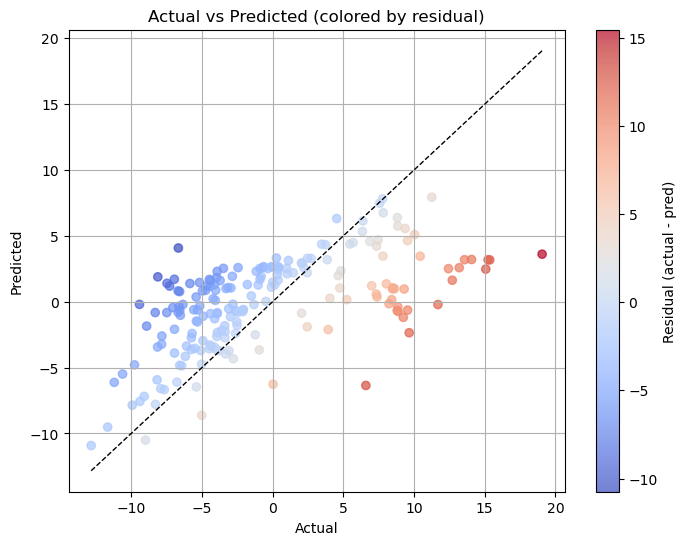

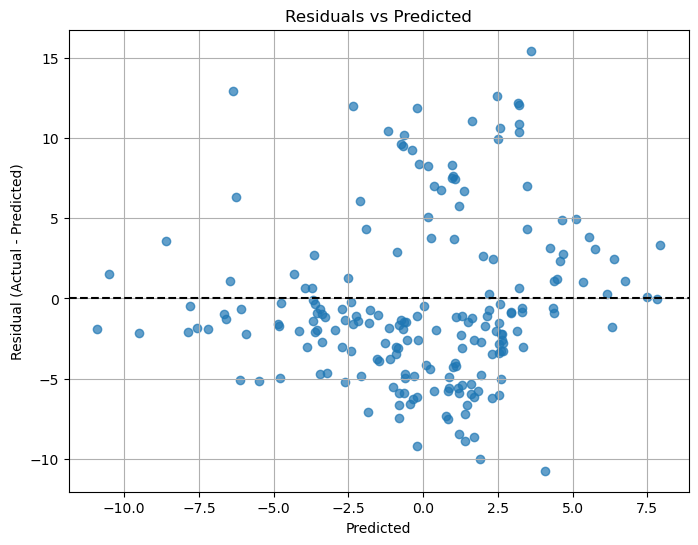

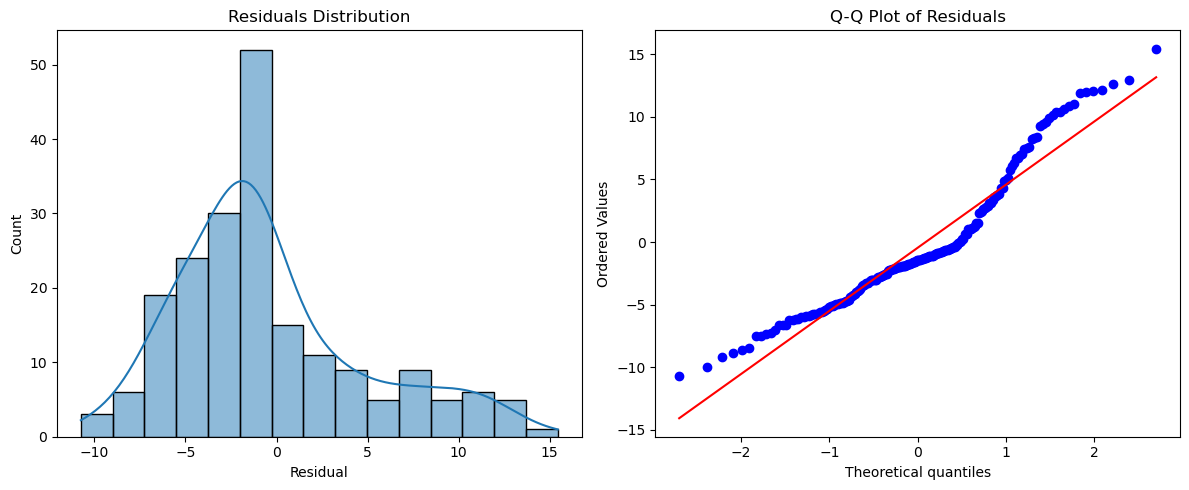

50th percentile of absolute residuals: 3.0947
75th percentile of absolute residuals: 5.8908
90th percentile of absolute residuals: 8.9027
95th percentile of absolute residuals: 10.6210
99th percentile of absolute residuals: 12.5983

Top 10 largest absolute residuals (index, actual, pred, residual):
129 19.05824250051964 3.613934675773657 15.444307824745984
21 6.5958155775244585 -6.353203480464881 12.94901905798934
82 15.07487853353008 2.4801247060643417 12.59475382746574
63 15.357352376705276 3.178158374707621 12.179194001997654
103 15.233283543584914 3.1885931510309318 12.044690392553981
143 9.657866893767912 -2.3513638774535552 12.009230771221468
118 11.69300187539078 -0.20816413894059882 11.901166014331379
167 12.70663557687674 1.634707876695223 11.071927700181517
135 14.070392223711767 3.210006781368655 10.860385442343112
138 -6.663029029716249 4.0815027572063745 -10.744531786922623


In [4]:
# Diagnostic metrics and plots for regression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import seaborn as sns
import scipy.stats as stats

# Ensure y_test and y_test_pred exist (they are in your notebook)
y_true = np.asarray(y_test)
y_pred = np.asarray(y_test_pred)
residuals = y_true - y_pred

# Metrics
r2 = r2_score(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
bias = residuals.mean()
res_std = residuals.std()

print(f"R²: {r2:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"Residual mean (bias): {bias:.4e}")
print(f"Residual std: {res_std:.4f}")

# Scatter: Actual vs Predicted (your existing plot) with residual colormap
plt.figure(figsize=(8,6))
sc = plt.scatter(y_true, y_pred, c=residuals, cmap='coolwarm', alpha=0.7)
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', lw=1)
plt.colorbar(sc, label='Residual (actual - pred)')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted (colored by residual)")
plt.grid(True)
plt.show()

# Residuals vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(0, color='k', linestyle='--')
plt.xlabel("Predicted")
plt.ylabel("Residual (Actual - Predicted)")
plt.title("Residuals vs Predicted")
plt.grid(True)
plt.show()

# Histogram and Q-Q of residuals
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(residuals, kde=True)
plt.xlabel("Residual")
plt.title("Residuals Distribution")

plt.subplot(1,2,2)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.tight_layout()
plt.show()

# Optional: print some percentiles and outlier info
for p in [50, 75, 90, 95, 99]:
    print(f"{p}th percentile of absolute residuals: {np.percentile(np.abs(residuals), p):.4f}")

# Optional: identify top outliers
n_outliers = 10
outlier_idx = np.argsort(np.abs(residuals))[-n_outliers:][::-1]
print(f"\nTop {n_outliers} largest absolute residuals (index, actual, pred, residual):")
for i in outlier_idx:
    print(i, y_true[i], y_pred[i], residuals[i])

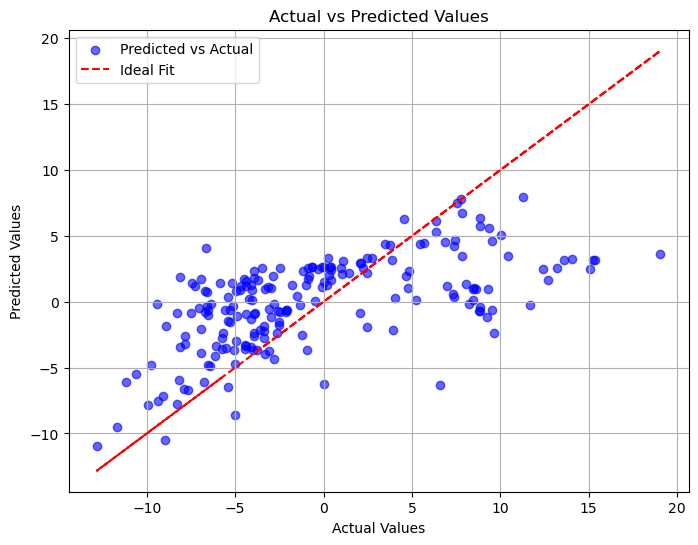

In [ ]:
# Diagnostic plots

The diagnostic metrics and plots are generated in the code cell above (run that cell first). It computes R², MSE, RMSE, MAE, residual mean/std, shows the Actual vs Predicted scatter (colored by residual), Residuals vs Predicted, and Residual distribution (histogram + Q–Q plot).

If you want to re-run just the scatter plot, run the diagnostics cell and then this cell can be updated to show only a selected plot. If you'd like, I can combine or reorder these cells for a cleaner flow.